In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matfile 
%matplotlib notebook
import seawater.eos80 as sw
import seawater.constants as swcons
import xarray as xr


In [11]:
with xr.open_dataset('202009/CtdGrid.nc') as cgrid:

    print(cgrid.O2)
    #cgrid['lon'][3] = cgrid['lon'][3]+2.
    #cgrid['lon'][3] = -123.25
    print(cgrid['lon'])

    print (cgrid.alongx,cgrid.acrossx)

    print(cgrid.keys()) 

    print(cgrid.O2[:, -1])


<xarray.DataArray 'O2' (depths: 324, time: 16)>
array([[210.068501,        nan, 176.648121, ...,        nan, 179.026095,
        178.572885],
       [209.996562, 198.880216, 175.693362, ..., 178.211485, 180.806886,
        178.296618],
       [213.081941, 201.103171, 174.626771, ..., 175.654489, 176.606667,
        176.940373],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * depths   (depths) float64 0.5 1.5 2.5 3.5 4.5 ... 320.5 321.5 322.5 323.5
  * time     (time) datetime64[ns] 2020-09-30T12:53:00 ... 2020-09-30T08:30:00
Attributes:
    units:    mmol/kg
<xarray.DataArray 'lon' (time: 16)>
array([-123.501733, -123.503133, -123.507017, -123.50165 , -123.50045 ,
       -123.472867, -123.45805 , -123.415467, -123.39185 , -123

In [3]:
# plot topo

dat=matfile.loadmatbunch('../../topo/SouthVanIsle.mat')
topo = dat['VanIsleTopo']
#print topo.keys()

In [4]:
dat=[[-123.534430, 48.523672],
    [-123.543075, 48.536432],
    [-123.544309, 48.551016],
    [-123.509733, 48.560130],
    [-123.497384, 48.569245],
    [-123.496149, 48.585651],
    [-123.499854, 48.639427],
    [-123.498619, 48.679531],
    [-123.496149, 48.695937],
    [-123.456633, 48.714167],
    [-123.420822, 48.726927],
    [-123.393654, 48.743333],
    [-123.370192, 48.757005],
    [-123.344259, 48.767031],
    [-123.326971, 48.765208],
    [-123.286220, 48.738776],
    [-123.259052, 48.718724],
    [-123.245469, 48.712344],
    [-123.261522, 48.693203],
    [-123.223241, 48.584740]]
dat = np.array(dat)

In [5]:
with xr.open_dataset('201909a/CtdGrid.nc') as cgrid:

    fig,ax = plt.subplots()
    ax.plot(cgrid.lon,cgrid.lat,'rd')
    for i in range(len(cgrid.lon)):
        ax.annotate(xy=(cgrid.lon[i],cgrid.lat[i]),s=cgrid['id'][i].values)
    #    ax.annotate()
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.set_aspect(1./np.cos(48.7*np.pi/180.))
    ax.contour(topo['Lon'],topo['Lat'],topo['z'],[-1000,0],colors='k')
    pc=ax.pcolormesh(topo['Lon'],topo['Lat'],topo['z'],vmin=-125,vmax=-50,cmap=plt.get_cmap('ocean'),rasterized=True)
    ax.set_xlim([-123.59,-123.1])
    ax.set_ylim([48.51,48.86])
    plt.colorbar(pc,shrink=0.7,extend='both')
    ax.plot(dat[:,0], dat[:,1])
    ax.set_xlabel('Longitude $[^o E]$')
    ax.set_ylabel('Latitude $[^o N]$')
    fig.savefig('201909CruiseTrack.pdf')

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/jklymak/Dropbox/Teaching/CruiseData314/CruiseData20/ctd/201909a/CtdGrid.nc'

<IPython.core.display.Javascript object>


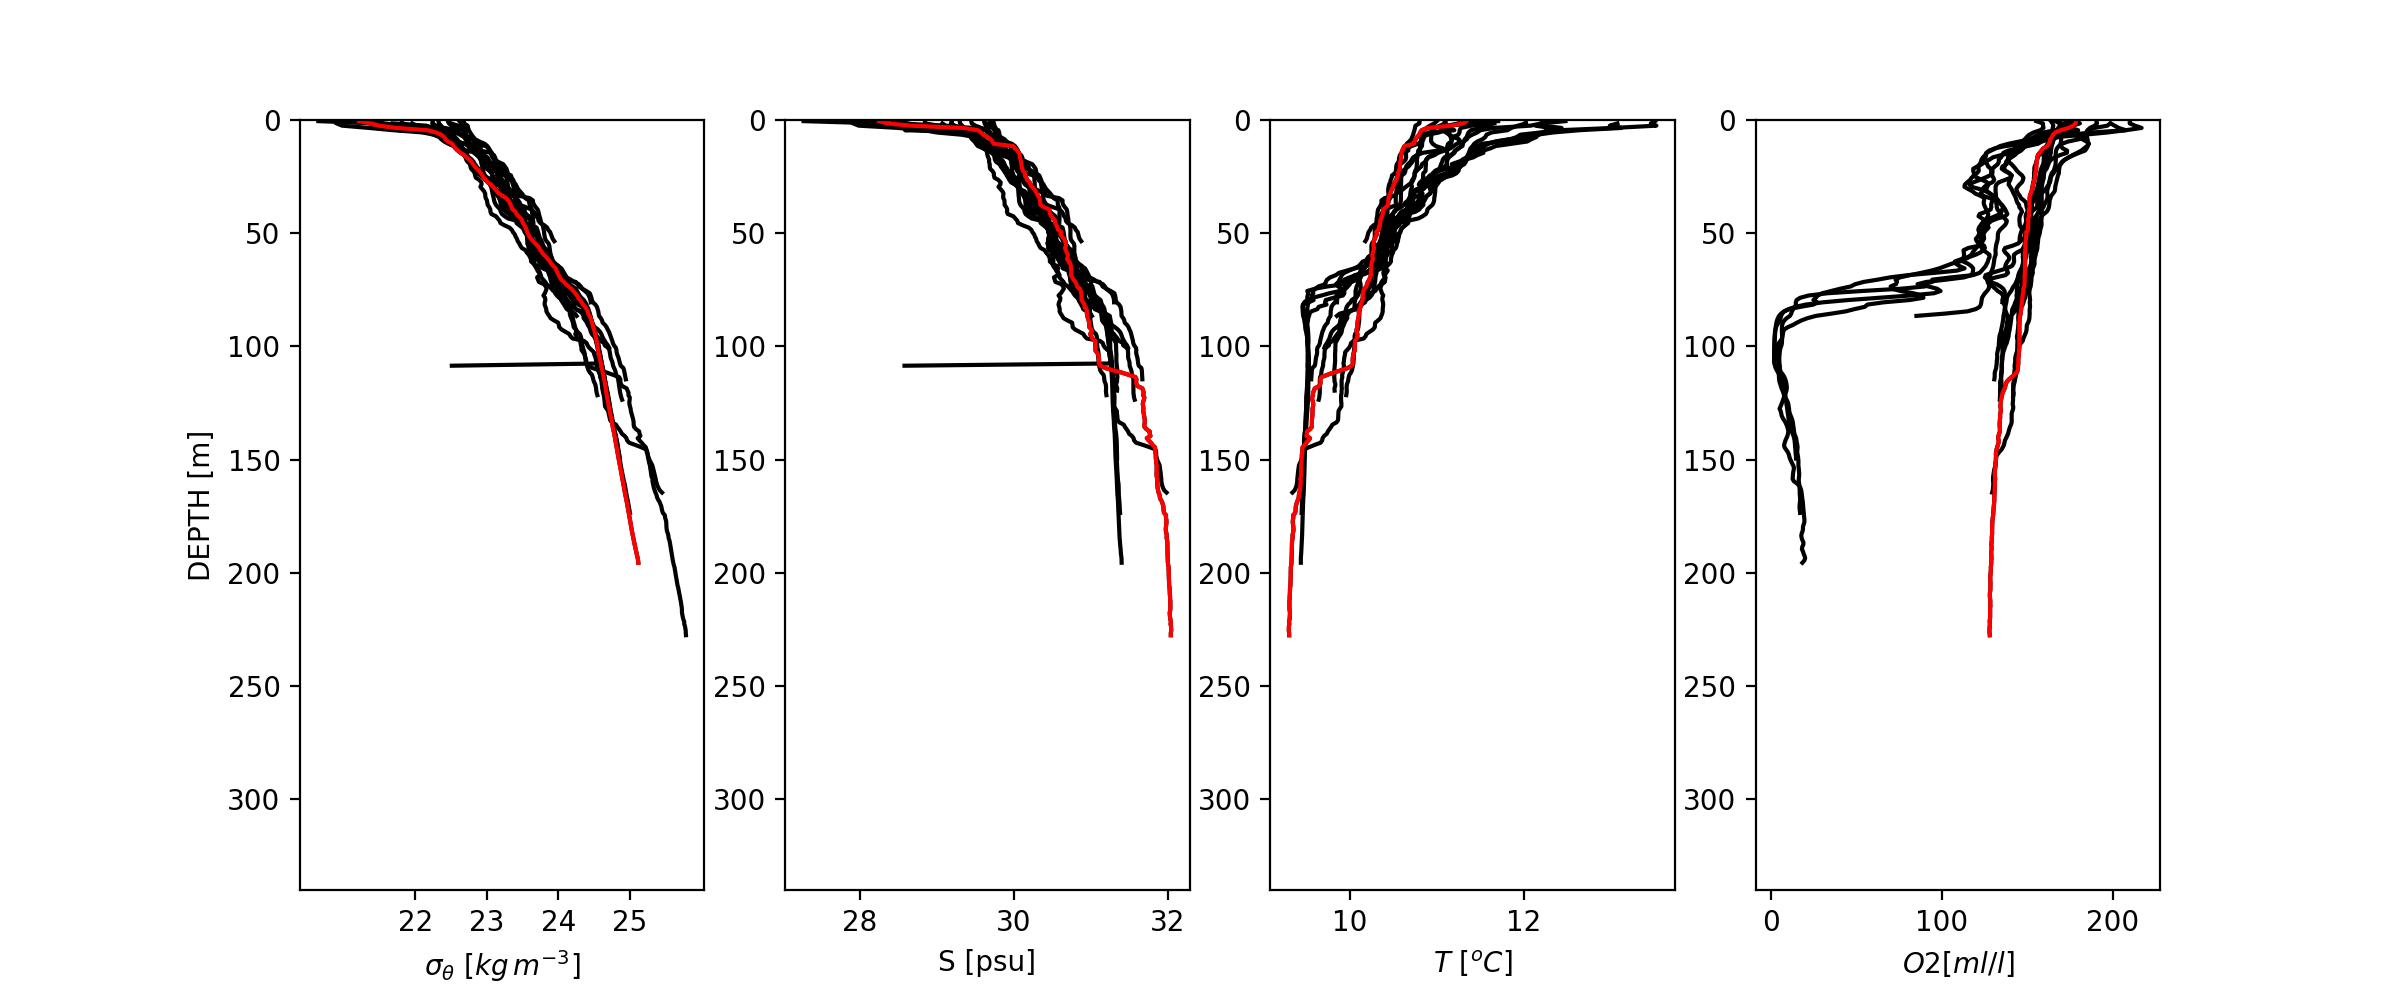

In [6]:
with xr.open_dataset('202009/CtdGrid.nc') as cgrid:
    fig,axs=plt.subplots(1,4,figsize=(12,5))
    tind = np.argsort(cgrid['time'].values)
    axs[0].plot(cgrid['pden'].data-1000.,cgrid['depths'],'k')
    #axs[0].plot(cgrid['pden'][:,insaan]-1000.,cgrid['depths'],'c')
    axs[0].plot(cgrid['pden'][:,tind[-1]]-1000.,cgrid['depths'],'r')

    # axs[0].plot(cgrid['pden'][:,tind[4]]-1000.,cgrid['depths'],'r')

    axs[0].set_ylim([340,0])
    axs[0].set_xlabel('$\sigma_{\\theta}\ [kg\,m^{-3}]$')
    axs[0].set_ylabel('DEPTH [m]')
    axs[0].set_xticks(np.arange(22.,26.,1.))

    axs[1].plot(cgrid['sal'].data,cgrid['depths'],'k')
    #axs[1].plot(cgrid['sal'][:,insaan],cgrid['depths'],'c')
    axs[1].plot(cgrid['sal'][:,-1],cgrid['depths'],'r')
    axs[1].set_ylim([340,0])
    #axs[1].set_xticks(np.arange(29.,34.,1.))
    axs[1].set_xlabel('S [psu]')

    axs[2].plot(cgrid['temp'].data,cgrid['depths'],'k')
    #axs[2].plot(cgrid['t'][:,insaan],cgrid['depths'],'c')
    axs[2].plot(cgrid['temp'][:,-1],cgrid['depths'],'r')
    axs[2].set_ylim([340,0])
    axs[2].set_xlabel('$T\ [^o C]$')

    axs[3].plot(cgrid['O2'].data,cgrid['depths'],'k')
    #axs[3].plot(cgrid['O2'][:,insaan],cgrid['depths'],'c')
    axs[3].plot(cgrid['O2'][:,-1],cgrid['depths'],'r')
    axs[3].set_ylim([340,0])
    axs[3].set_xlabel('$O2 [ml/l]$')
    #fig.savefig('20161005Profiles.pdf')

In [7]:
print(cgrid.temp)

<xarray.DataArray 'temp' (depths: 324, time: 16)>
array([[13.508441,       nan, 12.227251, ...,       nan, 11.705227, 11.339487],
       [13.459556, 13.075575, 12.197464, ..., 11.247339, 11.351902, 11.304703],
       [13.523921, 12.988432, 12.215892, ..., 11.125693, 11.146022, 11.164524],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]])
Coordinates:
  * depths   (depths) float64 0.5 1.5 2.5 3.5 4.5 ... 320.5 321.5 322.5 323.5
  * time     (time) datetime64[ns] 2020-09-30T12:53:00 ... 2020-09-30T08:30:00
Attributes:
    units:    deg C


In [8]:
import seawater

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<xarray.Dataset>
Dimensions:  (depths: 324, time: 16)
Coordinates:
  * depths   (depths) float64 0.5 1.5 2.5 3.5 4.5 ... 320.5 321.5 322.5 323.5
  * time     (time) datetime64[ns] 2020-09-30T12:53:00 ... 2020-09-30T08:30:00
Data variables:
    cond     (depths, time) float64 ...
    cond0    (depths, time) float64 ...
    temp     (depths, time) float64 ...
    pres     (depths, time) float64 ...
    O2       (depths, time) float64 ...
    O2sat    (depths, time) float64 ...
    Par      (depths, time) float64 ...
    Flu      (depths, time) float64 ...
    sal      (depths, time) float64 ...
    pden     (depths, time) float64 ...
    lat      (time) float64 ...
    lon      (time) float64 ...
    alongx   (time) float64 ...
    acrossx  (time) float64 ...
    id       (time) object ...


<IPython.core.display.Javascript object>


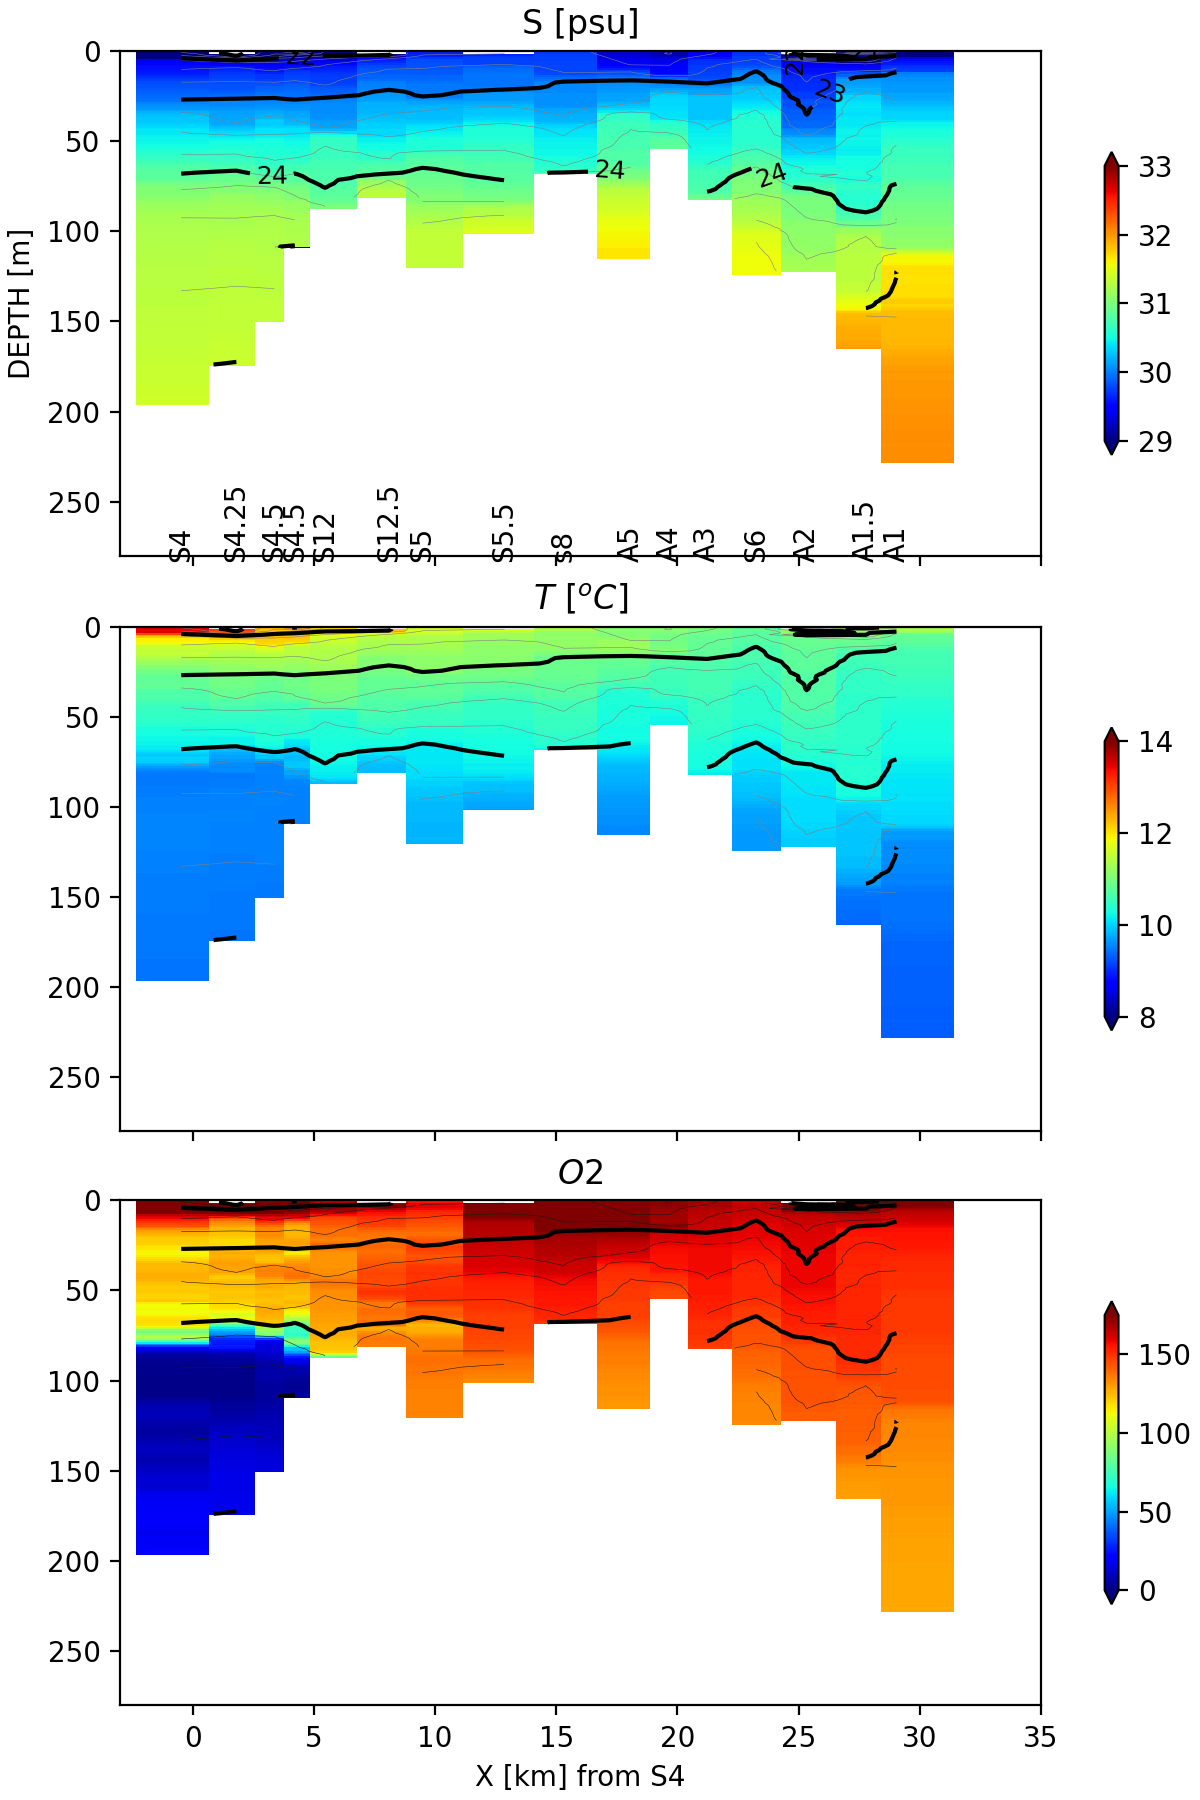

S4 <xarray.DataArray 'alongx' ()>
array(-0.474047)
Coordinates:
    time     datetime64[ns] 2020-09-30T12:53:00
Attributes:
    units:    dist from S4 [km]
S4.25 <xarray.DataArray 'alongx' ()>
array(1.80018)
Coordinates:
    time     datetime64[ns] 2020-09-30T12:34:00
Attributes:
    units:    dist from S4 [km]
S4.5 <xarray.DataArray 'alongx' ()>
array(3.366337)
Coordinates:
    time     datetime64[ns] 2020-09-30T12:18:00
Attributes:
    units:    dist from S4 [km]
S4.5 <xarray.DataArray 'alongx' ()>
array(4.206421)
Coordinates:
    time     datetime64[ns] 2020-09-30T12:06:00
Attributes:
    units:    dist from S4 [km]
S12 <xarray.DataArray 'alongx' ()>
array(5.460546)
Coordinates:
    time     datetime64[ns] 2020-09-30T11:54:00
Attributes:
    units:    dist from S4 [km]
S12.5 <xarray.DataArray 'alongx' ()>
array(8.088809)
Coordinates:
    time     datetime64[ns] 2020-09-30T11:36:00
Attributes:
    units:    dist from S4 [km]
S5 <xarray.DataArray 'alongx' ()>
array(9.480948)
Coordinat

/Users/jklymak/Dropbox/Teaching/CruiseData314/CruiseData20/ctd/PlotCrossSec.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc=ax[0].pcolormesh(x,cgrid['depths'],cgrid['sal'][:,ind],rasterized=True,vmin=slim[0],vmax=slim[1])
/Users/jklymak/Dropbox/Teaching/CruiseData314/CruiseData20/ctd/PlotCrossSec.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc=ax[1].pcolormesh(x,cgrid['depths'],cgrid['temp'][:,ind],rasterized=True,vmin=tlim[0],vmax=tlim[1])
/

In [9]:
%load_ext autoreload
%autoreload 2
with xr.open_dataset('202009/CtdGrid.nc') as cgrid:
    print(cgrid)
    from PlotCrossSec import PlotCrossSec 
    ind = range(len(cgrid.time))
    fig,ax=PlotCrossSec(cgrid,ind, o2name='O2')
    fig.savefig('figs/CrossSec202009.pdf')

<xarray.Dataset>
Dimensions:  (scan: 2172)
Coordinates:
  * scan     (scan) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    cond     (scan) float64 -0.0001529 -0.0001529 -0.0001383 -0.0001058 ...
    cond0    (scan) float64 -0.0001529 -0.000104 -0.0001101 -0.0001071 ...
    temp     (scan) float64 12.1 12.1 12.1 12.1 12.1 12.1 12.1 12.1 12.1 ...
    pres     (scan) float64 -0.1877 -0.1877 -0.1939 -0.1878 -0.1878 -0.1847 ...
    O2       (scan) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    O2sat    (scan) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    Par      (scan) float64 3.462e+10 3.479e+10 3.5e+10 3.531e+10 3.579e+10 ...
    Flu      (scan) float64 2.237 2.239 2.248 2.239 2.237 2.236 2.232 2.213 ...
    sal      (scan) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    pden     (scan) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    time     datetime64[ns] 2018-09-19T20:30:00
Attributes:


<IPython.core.display.Javascript object>


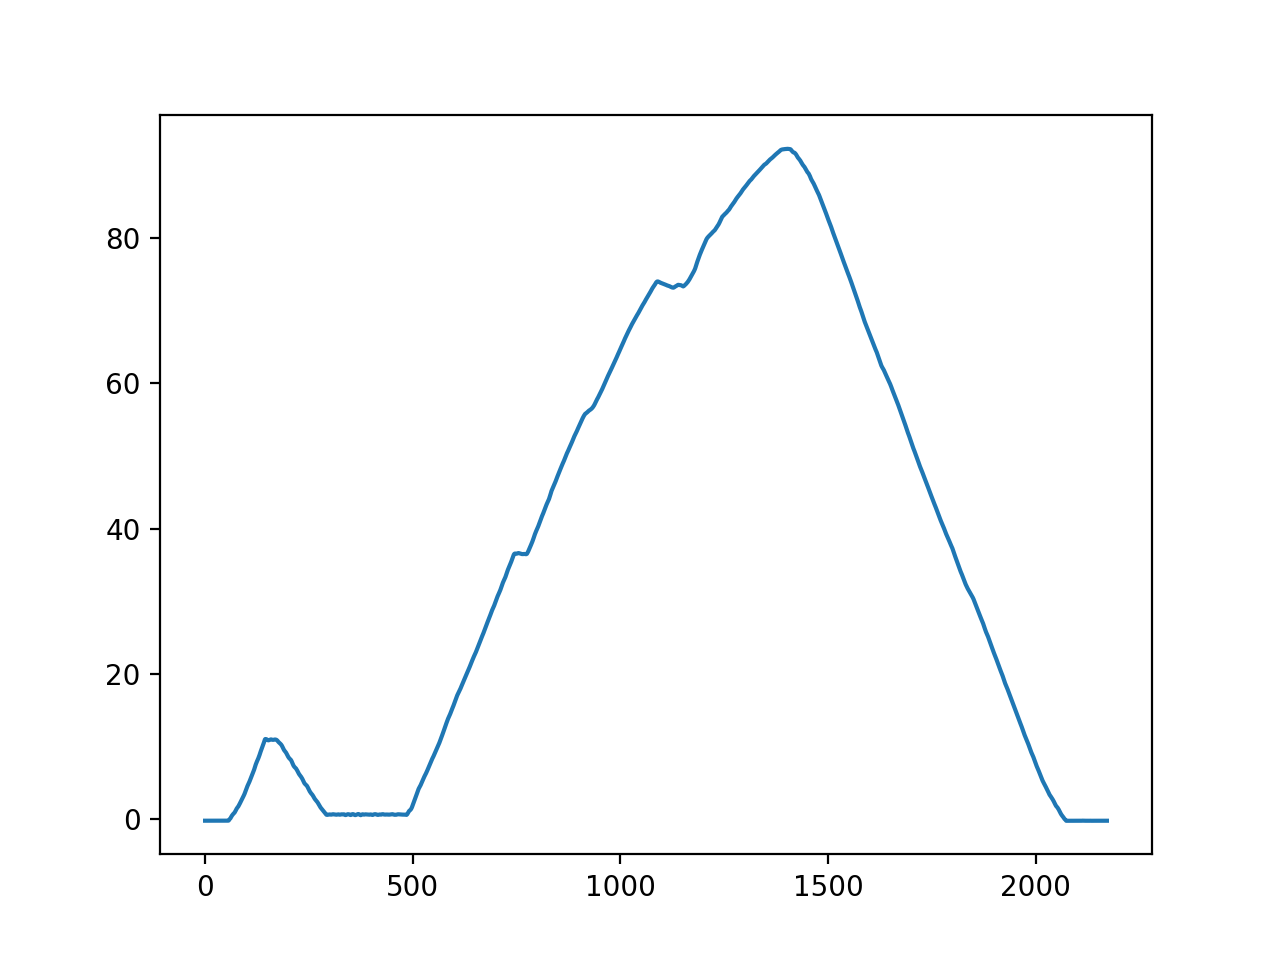

In [37]:
with xr.open_dataset('201809a/20180919_S12.nc') as ctd:
    print(ctd)
    fig,ax = plt.subplots()
    ax.plot(ctd.pres)

<IPython.core.display.Javascript object>


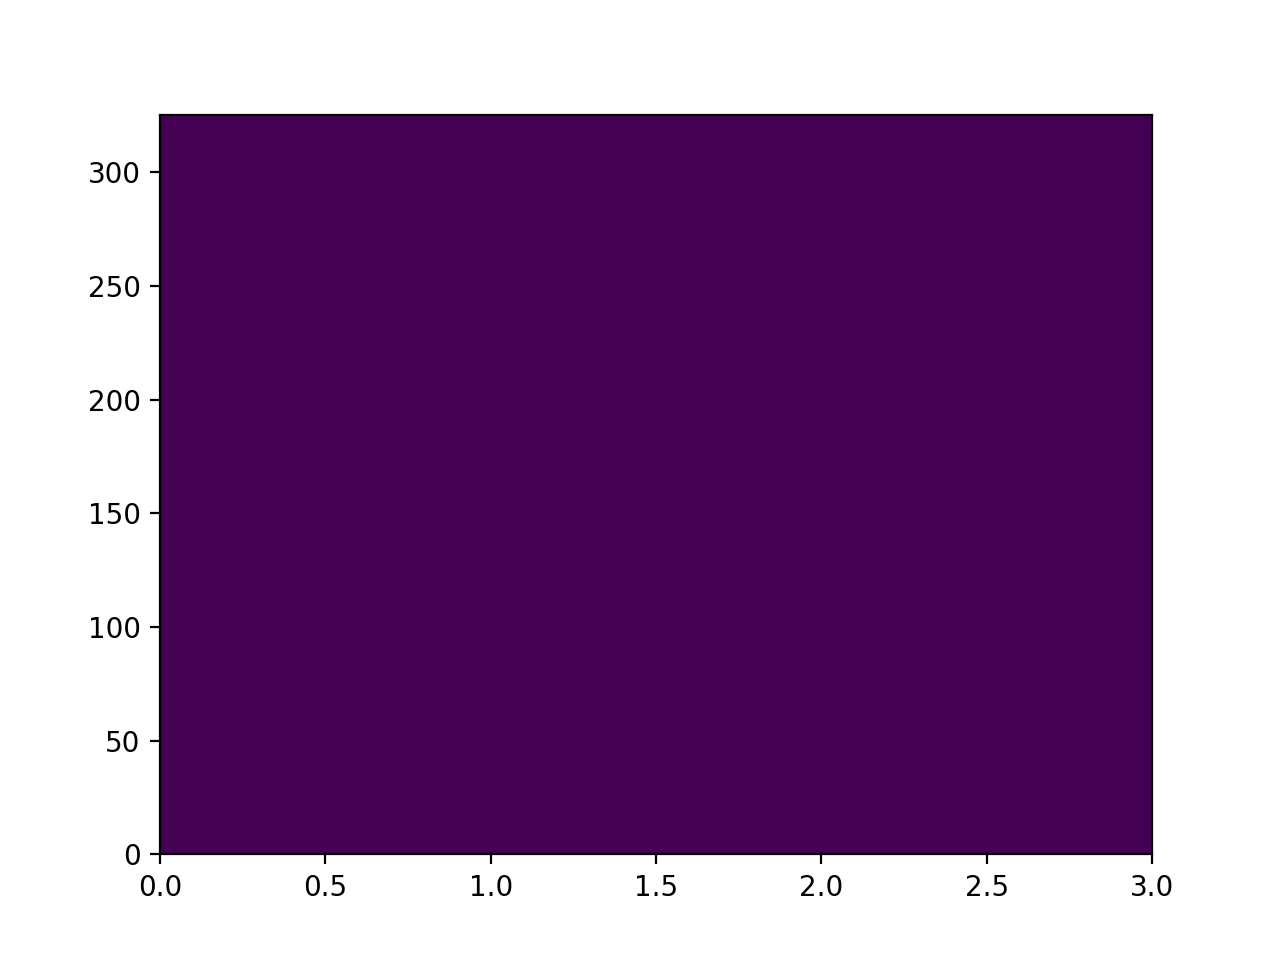

In [17]:
fig,ax=plt.subplots()
ax.pcolormesh(cgrid['t'],rasterized='True')


In [38]:
dat=matfile.loadmatbunch('201609b/CtdGrid.mat',masked=False)
cgrid = dat['cgrid']

In [43]:
print cgrid['t'][:12,:12]

[[         nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan]
 [         nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan]
 [         nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan]
 [ 14.41383114  14.47595532  14.08887655  13.39507031  13.71162718
   11.62144596  11.51680076  11.3956455   11.57512     10.91731054
   11.01188255]
 [ 14.11954182  14.44380998  13.83224798  13.23351409  13.59193541
   11.62283611  11.50751222  11.38328213  11.39732355  10.91574041
   11.00679611]
 [ 13.49762562  14.30637941  13.22787798  13.0819691   13.2335549
   11.60692048  11.48895184  11.35285984  11.27796817  10.91622431
   10.99364919]
 [ 13.11746399  13.95303933  12.87379891  13.16713538  12.71898052
   11.58979592  11.48496355  11.32

<IPython.core.display.Javascript object>


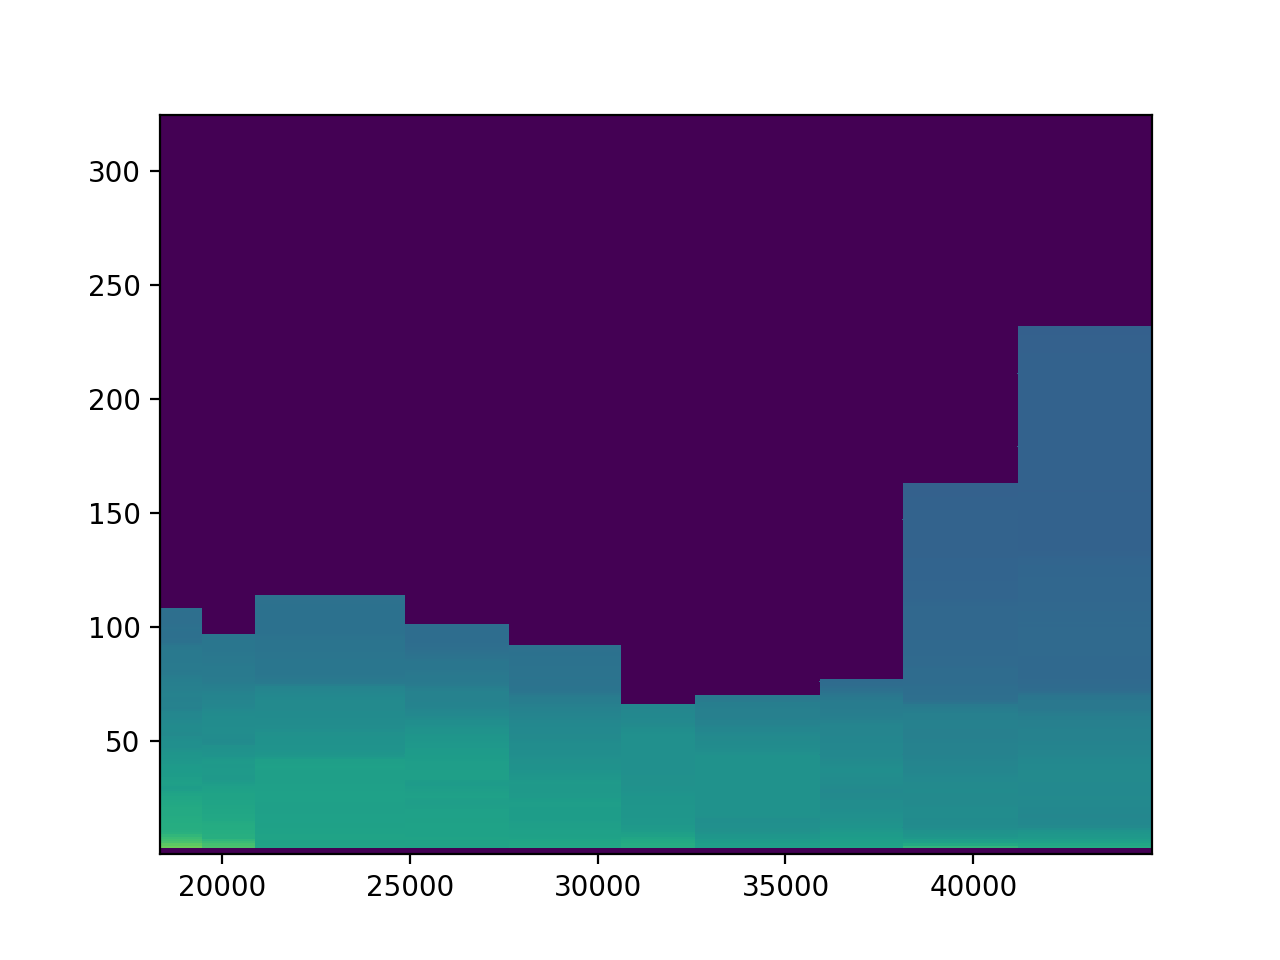

In [12]:
fig,ax=plt.subplots()
ax.pcolormesh(cgrid['alongx'],cgrid['depths'],cgrid['t'],vmin=6,vmax=16)

In [ ]:
w739871382